In [2]:
%%capture
!pip install neqsim

# Experimental data
Experimental data from a number of sources was collected for the solubility of CO2 in water

In [27]:
import pandas as pd
expdata_df = pd.read_csv('./water-CO2.csv')
expdata_df

,ID,ComponentSolute,ComponentSolvent,x1,StandardDeviation,Pressure,VapourPressure2,Type,Temperature,Reference
0,1,CO2,water,0.000985,0.000020,1.01325,0,VLE,283.15,Houghton1957
1,2,CO2,water,0.001946,0.000024,2.02650,0,VLE,283.15,Houghton1957
2,3,CO2,water,0.003800,0.000076,4.05300,0,VLE,283.15,Houghton1957
3,4,CO2,water,0.005560,0.000111,6.07950,0,VLE,283.15,Houghton1957
4,5,CO2,water,0.007230,0.000145,8.10600,0,VLE,283.15,Houghton1957
...,...,...,...,...,...,...,...,...,...,...
128,129,CO2,water,0.000817,0.000016,1.00000,0,VLE,288.15,Murray1971
129,130,CO2,water,0.000701,0.000014,1.00000,0,VLE,293.15,Murray1971
130,131,CO2,water,0.000609,0.000012,1.00000,0,VLE,298.15,Murray1971
131,132,CO2,water,0.000514,0.000010,1.00000,0,VLE,305.15,Murray1971


<Figure size 640x480 with 0 Axes>

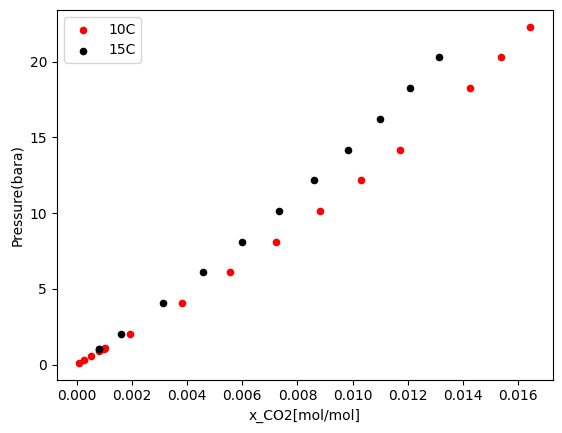

In [28]:
from matplotlib import pyplot as plt
fig = plt.figure()
data283 = expdata_df.loc[expdata_df['Temperature'] == 283.15]
data288 = expdata_df.loc[expdata_df['Temperature'] == 288.15]
plot1 = data283.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='red')	
data288.plot(ax=plot1, x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='black')	
plt.legend(['10C', '15C'])
plt.show()

# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

model  CPAs-SRK-EOS-statoil
mixing rule  classic-CPA_T
kij  -0.27686
kijT  0.001121


<Figure size 640x480 with 0 Axes>

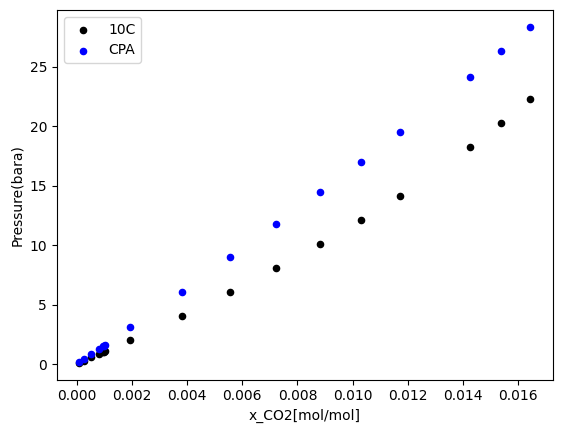

In [29]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

# Creating a fluid in neqsim
fluid1 = fluid('cpa') #create a fluid using the SRK-EoS
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

#fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1, 0.02)
#fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1, 0.02)
#fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)
#fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)

def bubpres(x):
    fluid1.setPressure(1.0)
    fluidComposition(fluid1, [x, 1.0-x])
    bubp(fluid1)
    return float(fluid1.getPressure('bara'))

molfracs = data283['x1'].values.tolist()
bubpresres = [bubpres(x) for x in molfracs]

dataWithExperiment = data283.assign(CPA = bubpresres)

print('model ', fluid1.getModelName())
print('mixing rule ', fluid1.getMixingRuleName())
print('kij ', fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameter(0,1))
print('kijT ', fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameterT1(0,1))

from matplotlib import pyplot as plt
fig = plt.figure()
#plot1 = data283.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='red')	
plot1 = data283.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='black')	
dataWithExperiment.plot(ax=plot1, x='x1', y='CPA', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='blue')	
plt.legend(['10C', 'CPA'])
plt.show()

In [36]:
from neqsim import methods
methods(fluid1.getPhase(0).getMixingRule())

clone
clone
clone
clone
getkijdTdT
getkij
getkijdT
calcAiT
calcATT
calcAiTT
calcA
calcAi
calcAij
calcAT
getBmixType
setBmixType
getMixingRuleName
calcB
calcBij
calcBi
getA
getB
setMixingRuleGEModel
setCalcEOSInteractionParameters
setBinaryInteractionParameterji
setBinaryInteractionParameter
getBinaryInteractionParameter
setBinaryInteractionParameterT1
getBinaryInteractionParameterT1
setnEOSkij
setBinaryInteractionParameterij
getGEPhase
getbij
calcBi2
wait
wait
wait
equals
toString
hashCode
getClass
notify
notifyAll


In [39]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

# Creating a fluid in neqsim
fluid1 = fluid('cpa') #create a fluid using the SRK-EoS
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

#fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1, 0.02)
#fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1, 0.02)
#fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)
#fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)

def bubpres(inp):
    fluid1.setPressure(inp[2])
    fluid1.setTemperature(inp[1], 'K')
    fluidComposition(fluid1, [inp[0], 1.0-inp[0]])
    bubp(fluid1)
    deviation = (fluid1.getPressure('bara')-inp[2])/inp[2]*100.0
    return fluid1.getPressure('bara')

molfracs = expdata_df[['x1', 'Temperature', 'Pressure']].values.tolist()
bubpresres = [bubpres(inp) for inp in molfracs]
dataWithExperiment = expdata_df.assign(CPA = bubpresres)

devdf = (dataWithExperiment['CPA'] - dataWithExperiment['Pressure']) / dataWithExperiment['CPA']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev = devdf.values)

print('median average deviation ', devdf.mad(axis=0))

dataWithExperimentAndDev.to_csv('./water-CO2-exp.csv')

median average deviation  10.497734501502613


/tmp/ipykernel_1462/4067264059.py:34: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('median average deviation ', devdf.mad(axis=0))
